## Explain the importance of eigenvalues and eigenvectors in PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Explanation

Eigenvalues and eigenvectors are central to **Principal Component Analysis (PCA)** because they provide the mathematical foundation for identifying the directions and magnitudes of the most significant patterns in your data.

#### **1. Eigenvectors define directions of maximum variance (principal components)**

- Each **eigenvector** of the data’s covariance matrix points in a direction in the data space.
- These directions are **orthogonal** (uncorrelated) and represent the axes along which the data varies the most.
- These directions are what we call the **principal components**.

Think of them as the new "coordinate axes" that are better aligned with the structure of your data.


#### **2. Eigenvalues tell you how important each direction is**

- The **eigenvalue** associated with each eigenvector tells you the **amount of variance** in the data along that direction.
- Larger eigenvalue → more spread of data → more important that direction is for representing the data.

This lets you **rank** the components and decide how many you need to keep for a lower-dimensional representation.


#### **3. Dimensionality reduction with minimal loss of information**

- By projecting your data onto the top $k$ eigenvectors (those with the largest eigenvalues), you get a **compressed version** of the data that still retains most of its variability.
- This is how PCA reduces the number of variables while keeping the essence of the dataset.

### Visualisation

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


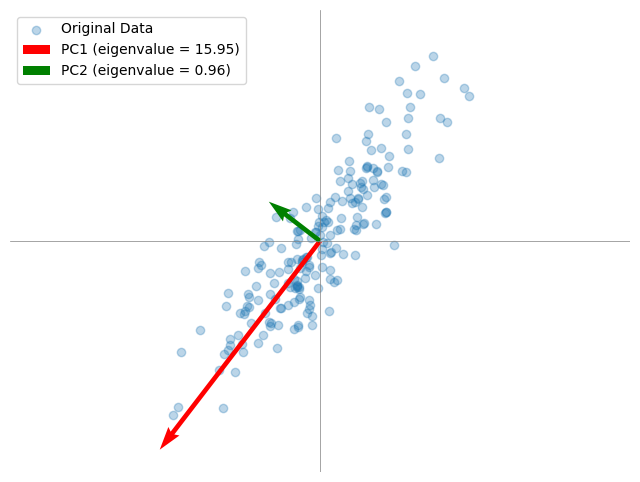

In [12]:
# Step 1: Generate anisotropic 2D data
np.random.seed(0)
n_samples = 200
stretch = np.array([[4, 0], [0, 1]])
rotation = np.array([[0.6, -0.8], [0.8, 0.6]])
X = np.random.randn(n_samples, 2) @ stretch @ rotation.T

# Step 2: Centre the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(X_centered.T)

# Step 4: Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvectors by descending eigenvalues
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Step 6: Project the data onto the first principal component
X_pca = X_centered @ eigvecs[:, 0]

# Step 7: Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3, label='Original Data')
origin = np.zeros(2)

for i in range(2):
    vec = eigvecs[:, i]
    plt.quiver(*origin, *(vec * np.sqrt(eigvals[i]) * 3), 
               angles='xy', scale_units='xy', scale=1, 
               color='r' if i == 0 else 'g', 
               label=f'PC{i+1} (eigenvalue = {eigvals[i]:.2f})')

plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)

plt.xticks([])
plt.yticks([])
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().spines[['left', 'right', 'top', 'bottom']].set_visible(False)
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.axis('equal')

xlim = np.max(np.abs(X_centered[:, 0])) * 1.25
ylim = np.max(np.abs(X_centered[:, 1])) * 1.25
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)

plt.legend()